<a href="https://colab.research.google.com/github/thinhntr/CS231.L11.KHCL_Computer_Vision_Intro/blob/master/Week6/Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from numpy import cos, sin
import matplotlib.pyplot as plt

In [3]:
def show_shape(*shapes, dpi=130):
    fig = plt.figure(dpi=dpi)
    ncols = len(shapes)
    i = 1
    for shape in shapes:
        ax = fig.add_subplot(1, ncols, i)
        i += 1
        ax.set_aspect('equal')
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.invert_yaxis()
        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.fill(shape[0], shape[1], facecolor='mediumaquamarine')


In [4]:
SHEAR = np.array([[1, 1],
                  [0, 1]])

In [5]:
s = 2
SCALE = np.array([[s, 0],
                  [0, s]])

In [6]:
theta = (-90 / 180) * np.pi

ROTATION = np.array([[cos(theta), -sin(theta)],
                     [sin(theta), cos(theta)]])

In [7]:
rectangle = np.array([[0, 0, 2, 2], 
                      [0, 1, 1, 0]])

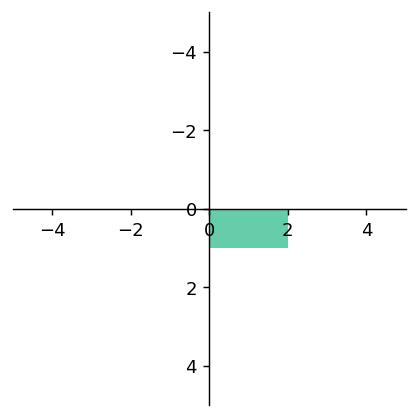

In [8]:
show_shape(rectangle)

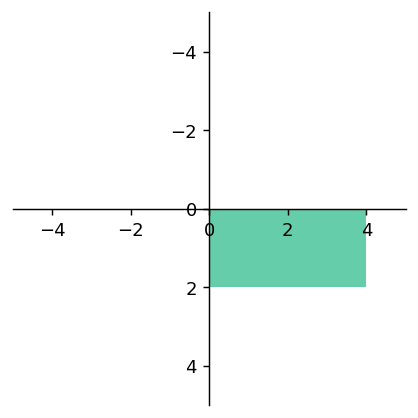

In [9]:
show_shape(SCALE @ rectangle)

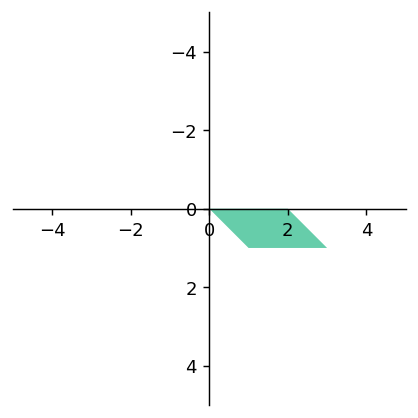

In [10]:
show_shape(SHEAR @ rectangle)

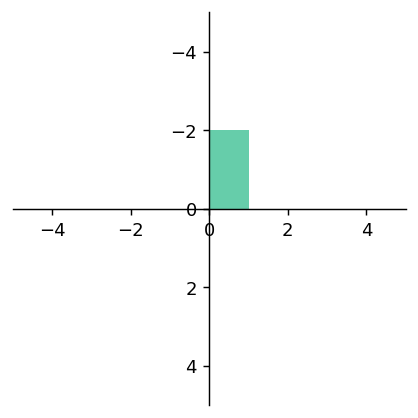

In [11]:
show_shape(ROTATION @ rectangle)

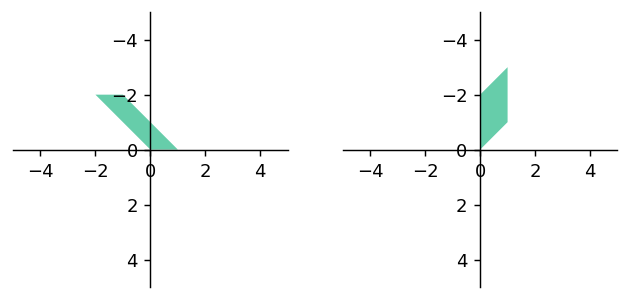

In [12]:
show_shape(SHEAR @ ROTATION @ rectangle, ROTATION @ SHEAR @ rectangle)

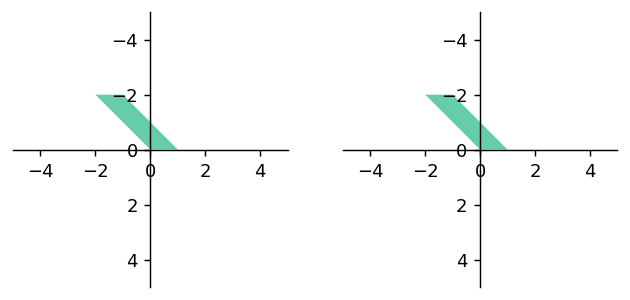

In [13]:
new_shape_0 = (SHEAR @ ROTATION) @ rectangle
new_shape_1 = SHEAR @ (ROTATION @ rectangle)

show_shape(new_shape_0, new_shape_1)

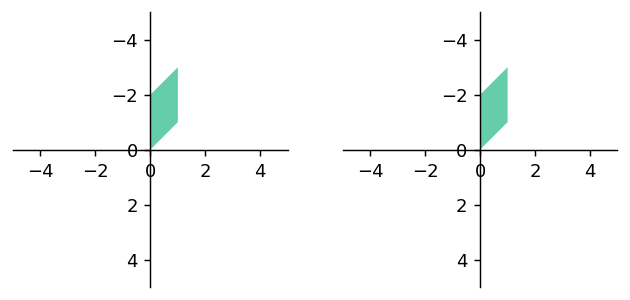

In [14]:
new_shape_3 = (ROTATION @ SHEAR) @ rectangle
new_shape_4 = ROTATION @ (SHEAR @ rectangle)

show_shape(new_shape_3, new_shape_4)

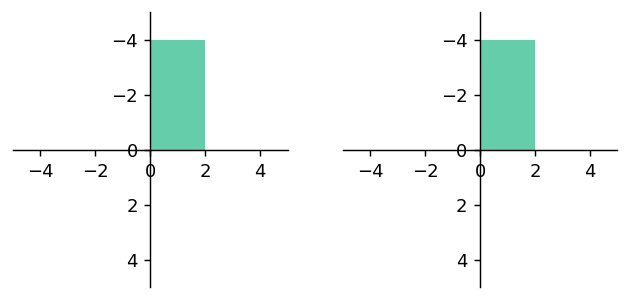

In [15]:
new_shape_5 = ROTATION @ SCALE @ rectangle
new_shape_6 = SCALE @ ROTATION @ rectangle

show_shape(new_shape_5, new_shape_6)

In [24]:
B = np.array([[1, 0],
              [0, -1]])
B_ = np.linalg.inv(B)

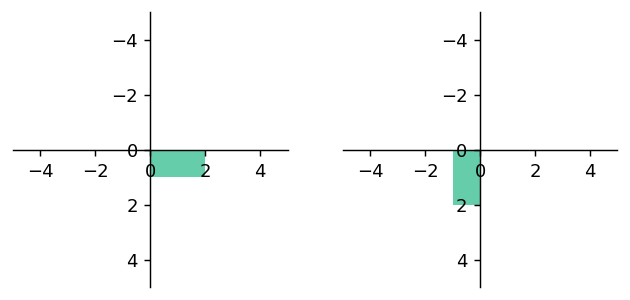

In [25]:
show_shape(rectangle, B_ @ ROTATION @ B @ rectangle)

In [26]:
C = np.hstack([B_@ROTATION@B, [[1], [0]]])
C

array([[ 6.123234e-17, -1.000000e+00,  1.000000e+00],
       [ 1.000000e+00,  6.123234e-17,  0.000000e+00]])

In [28]:
new_rec = np.vstack([rectangle, np.ones((1, rectangle.shape[1]))])
new_rec

array([[0., 0., 2., 2.],
       [0., 1., 1., 0.],
       [1., 1., 1., 1.]])

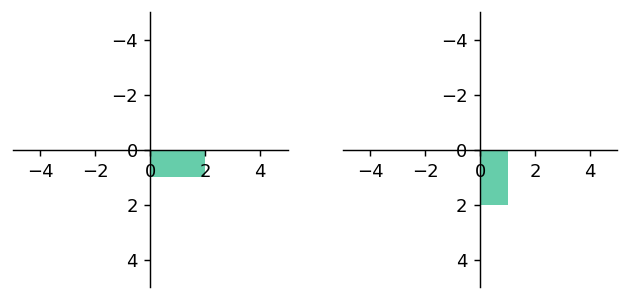

In [29]:
show_shape(rectangle, C @ new_rec)